# Packages & Includes

In [ ]:
using Plots
using StatsBase
using LinearAlgebra
using Statistics
using JLD2
using Dates
using LsqFit
using StaticArrays

# data structure module (needs to be module to avoid overwriting local variables in REPL scope)
include("SpinSimParams.jl")
using .SpinSimParams

# function libraries
include("spin_sims.jl");

# Parameters

In [2]:
# spin operators
#Ix = @SMatrix [0 1/2; 1/2 0];
#Iy = @SMatrix [0 -1im/2; 1im/2 0];
#Iz = @SMatrix [1/2 0; 0 -1/2];
#M_op = Ix + 1im*Iy;

# gamma
γ = 2*π*1e6;

# time variables
τ = 100e-6;
dt = 2;

# pulse operators
#UL90 = exp(-1im*pi*Ix/2);
#UR90 = exp(1im*pi*Ix/2);

# interaction
α = [0.10,0.14,0.18]; # [0.1, 0.2, 0.3, 0.4];
ω = [0.000,0.001,0.005,0.01,0.1]; # [0, 0.001, 0.005];

# spin ensemble
ν0 = 10;
bw = 0.5;
dfreq = 0.002;

# initial conditions
dim = 2;
ψ_0 = @SArray [1 0];
ρ_temp = [ψ_0[i]*ψ_0[j] for i = 1:dim, j = 1:dim];

ρ0 = @SMatrix [ρ_temp[1,1] ρ_temp[1,2]; ρ_temp[2,1] ρ_temp[2,2]];

# Create Parameter File

In [3]:
params = make_parameters(γ, τ, dt, α, ω, ν0, bw, dfreq, ρ0);
vars = ["α", "ω"];

# Run the Simulation

In [4]:
I, d = make_idx(vars, params)
M_list = Array{Any}(undef, d)

for i in I
    println(i) # print loop index for gauging speed locally
    tparams = temp_parameters(params, vars, i)
    M_list[i] = spin_echo_sim(tparams)
end

# @save "001_M_list.jld2" M_list
# @save "001_parameters.jld2" params

CartesianIndex(1, 1)
CartesianIndex(2, 1)
CartesianIndex(3, 1)
CartesianIndex(1, 2)
CartesianIndex(2, 2)
CartesianIndex(3, 2)
CartesianIndex(1, 3)
CartesianIndex(2, 3)
CartesianIndex(3, 3)
CartesianIndex(1, 4)
CartesianIndex(2, 4)
CartesianIndex(3, 4)
CartesianIndex(1, 5)
CartesianIndex(2, 5)
CartesianIndex(3, 5)


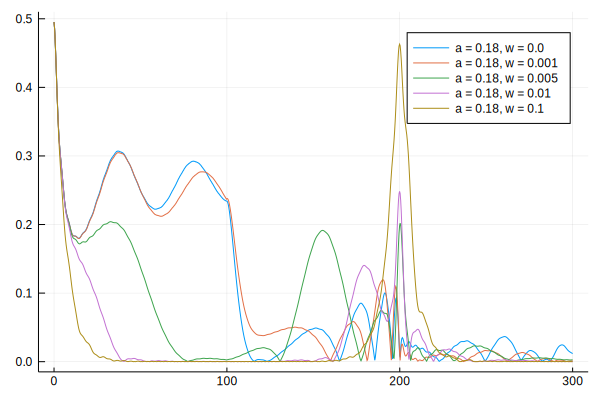

In [5]:
plt1 = plot()
var1 = 3
for var2 = 1:5
    tar_M = M_list[var1,var2]
    t = LinRange(0, 300, size(tar_M, 1));
    plot!(t, broadcast(abs, tar_M),label=string("a = ",α[var1],", w = ",ω[var2]))
end
display(plt1)

# Dissipation version

In [4]:
gam_0 = 1e-3
gam_1 = gam_0
gam_2 = gam_0
gam_3 = 0.0

Iz = @SMatrix [1/2 0; 0 -1/2];

nJ = 3
Lj_list = []
push!(Lj_list, sqrt(gam_1)* @SMatrix [0 1; 0 0]) # down to up flip
push!(Lj_list, sqrt(gam_2)* @SMatrix [0 0; 1 0]) # up to down flip
push!(Lj_list, sqrt(gam_3)*Iz) # phase decoherence

params.Lj = Lj_list

I, d = make_idx(vars, params)
M_list = Array{Any}(undef, d)

for i in I
    println(i) # print loop index for gauging speed locally
    tparams = temp_parameters(params, vars, i)
    M_list[i] = spin_echo_sim_liouville(tparams)
end

CartesianIndex(1, 1)
CartesianIndex(2, 1)
CartesianIndex(3, 1)
CartesianIndex(1, 2)
CartesianIndex(2, 2)
CartesianIndex(3, 2)
CartesianIndex(1, 3)
CartesianIndex(2, 3)
CartesianIndex(3, 3)
CartesianIndex(1, 4)
CartesianIndex(2, 4)
CartesianIndex(3, 4)
CartesianIndex(1, 5)
CartesianIndex(2, 5)
CartesianIndex(3, 5)


In [30]:
fprefix = "test_run_06-16-2020"
@save string(fprefix,"_data.jld2") M_list params
#@save string(fprefix,"_M_list.jld2") M_list
#@save string(fprefix,"_parameters.jld2") params

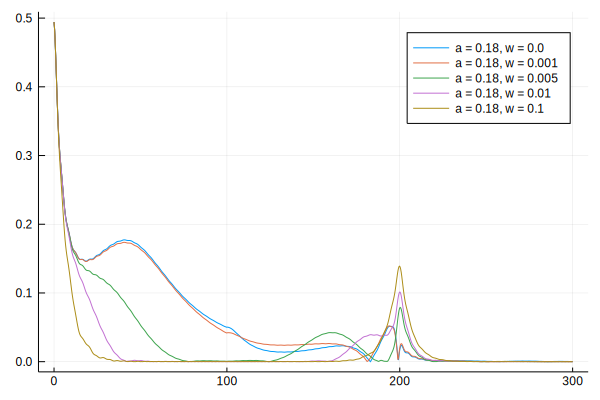

In [8]:
plt1 = plot()
var1 = 3
for var2 = 1:5
    tar_M = M_list[var1,var2]
    t = LinRange(0, 300, size(tar_M, 1));
    plot!(t, broadcast(abs, tar_M),label=string("a = ",params.α[var1],", w = ",params.ω[var2]))
end
display(plt1)

In [21]:
@load "test_run_06-16-2020_data.jld2" M_list params
#@load "test_run_06-16-2020_M_list.jld2"
#@load "test_run_06-16-2020_parameters.jld2"
